In [1]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def setp_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    calculation = np.dot(weights, x) + bias
    return step_function(calculation)

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))

def feed_forward(neural_network, input_vector):
    outputs = []
    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        input_vector = output
    return outputs

In [3]:
def backpropagate(network, input_vector, targets):
    hidden_outputs, outputs = feed_forward(network, input_vector)
    output_deltas = [output * (1-output) * (output-target)
                    for output, target in zip(outputs, targets)]
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output
    hidden_deltas = [hidden_output * (1-hidden_output) * np.dot(output_deltas, [n[i] for n in output_layer])
                    for i, hidden_output in enumerate(hidden_outputs)]
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

In [4]:
inputs = [[1,1,1,1,1,
          1,0,0,0,1,
          1,0,0,0,1,
          1,0,0,0,1,
          1,1,1,1,1],
         [0,0,1,0,0,
         0,0,1,0,0,
         0,0,1,0,0,
         0,0,1,0,0,
         0,0,1,0,0],
         [1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1,
         1,0,0,0,0,
         1,1,1,1,1],
         [1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1],
         [1,0,0,0,1,
         1,0,0,0,1,
         1,1,1,1,1,
         0,0,0,0,1,
         0,0,0,0,1],
         [1,1,1,1,1,
         1,0,0,0,0,
         1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1],
         [1,1,1,1,1,
         1,0,0,0,0,
         1,1,1,1,1,
         1,0,0,0,1,
         1,1,1,1,1],
         [1,1,1,1,1,
         0,0,0,0,1,
         0,0,0,0,1,
         0,0,0,0,1,
         0,0,0,0,1],
         [1,1,1,1,1,
         1,0,0,0,1,
         1,1,1,1,1,
         1,0,0,0,1,
         1,1,1,1,1],
         [1,1,1,1,1,
         1,0,0,0,1,
         1,1,1,1,1,
         0,0,0,0,1,
         1,1,1,1,1]]
targets = [[1 if i==j else 0 for i in range(10)]
          for j in range(10)]

random.seed(0)
input_size = 25
num_hidden = 5
output_size = 10

hidden_layer = [[random.random() for _ in range(input_size + 1)]
               for _ in range(num_hidden)]
output_layer  = [[random.random() for _ in range(num_hidden + 1)]
                for _ in range(output_size)]
network = [hidden_layer, output_layer]

In [5]:
for _ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

In [6]:
def predict(input):
    return feed_forward(network, input)[-1]
my_three = [0,1,1,1,0,
           0,0,0,1,1,
           0,0,1,1,0,
           0,0,0,1,1,
           0,1,1,1,0]
my_seven = [1,1,1,1,1,
           0,0,0,0,1,
           0,0,0,1,0,
           0,0,0,1,0,
           0,0,0,1,0]
#predict(my_three)
predict(my_seven)

[6.062444962535723e-09,
 0.020139666358430584,
 2.1382110766694345e-08,
 0.9798798233153204,
 1.4041266419974099e-06,
 8.236749588906475e-07,
 6.790692897125756e-11,
 0.028383372165843405,
 4.959743497388619e-09,
 0.04697092794687027]

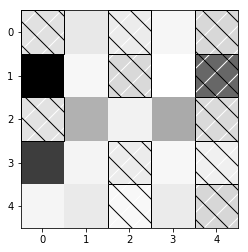

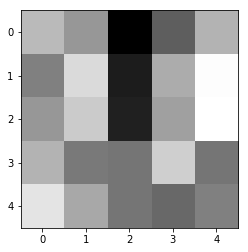

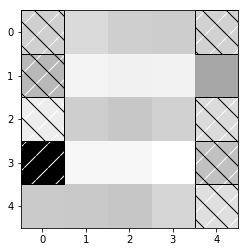

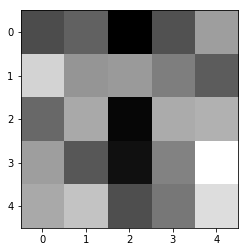

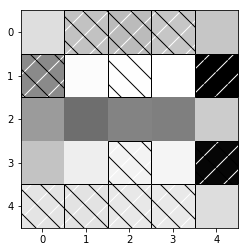

In [7]:
def neuron_plot(i):
    weights = network[0][i]
    abs_weights = list(map(abs, weights))
    grid = [abs_weights[row:(row+5)]
           for row in range(0,25,5)]
    ax = plt.gca()
    ax.imshow(grid, cmap=matplotlib.cm.binary, interpolation='none')

    def patch(x, y, hatch, color):
        return matplotlib.patches.Rectangle((x-0.5, y-0.5), 1, 1, hatch=hatch, fill=False, color=color)

    for i in range(5):
        for j in range(5):
            if weights[5*i + j] < 0:
                ax.add_patch(patch(j, i, '/', "white"))
                ax.add_patch(patch(j, i, '\\', "black"))
    plt.show()

neuron_plot(0)
neuron_plot(1)
neuron_plot(2)
neuron_plot(3)
neuron_plot(4)

In [8]:
x,y = 1,2
print(x, y)
#a, b = [[1],[2],[3],[2,3]]
#print(a, b)
feed_forward(network, my_three)

1 2


[[0.04514674933197369,
  0.9999786803418749,
  0.999999999030672,
  0.9999922372028395,
  3.603628359983815e-07],
 [7.898905429710058e-09,
  0.006665177772043016,
  2.0003358244156753e-08,
  0.9670805752908446,
  9.057484917804477e-07,
  1.5388836660126693e-06,
  1.1968592786041444e-10,
  0.016174062391313422,
  1.3020149516525991e-08,
  0.06791891584584524]]